##Exploratory Data Analysis (EDA) & Data Cleaning

New dataset: NPRI-INRP_ReleasesRejets_1993-present

Project: ML-Ready Dataset Preparation for Environmental Impacts Prediction
CMPT 2400 - Data Preparations and Analytics

## Team Members:
- Alma Soria
- Angela Lekivetz
- Crystal Blackburn
- Michaela Goud



# Introduction

This notebook is an EDA of an additonal dataset that includes releases from 2023. We will clean and potentially use this dataset to merge with our original NPRI 2000-2020 dataset for use in Phase II of the project.

The NPRI, established under the authority of [Sections 46 to 53 of CEPA, 1999](https://www.canada.ca/en/services/environment/pollution-waste-management/national-pollutant-release-inventory.html), is a key resource for tracking pollutants released into the air, water, and land by industrial and commercial facilities across Canada. Transparency and public awareness are fundamental to the NPRI, reflecting the principle that the public has the right to know about pollutants affecting their environment.

## Chosen Problem
**Problem #5:**  
*“Based on NPRI data, which industry is predicted to have the highest growth of releases in 5 years? Which will have the largest decline?”*

- **Objective:** Prepare this NPRI dataset of 2023 release data to be merged with our original cleaned NPRI 2000-2020 releases dataset.

Link to notebook for phase I - [EDA & Cleaning of NPRI 2000-2020 releases dataset:](https://drive.google.com/file/d/1OReVX4nEB12GNLN6xVsWSxyfq4zP-k05/view?usp=sharing)


# 1. Understanding

## Import Libraries & Create Dataframe

Reading data directly from a saved CSV file through Google Drive is much faster than loading it from Excel.

[The link for this dataset](https://drive.google.com/file/d/1pkKg0TWOwLZckr1PcbH2fE1-IzR4fa-9/view?usp=sharing) is in this hyperlink.

By using the code below, we can significantly reduce the waiting time and streamline our data processing workflow.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import gdown #To download files, in this case from google drive

# Set pandas display options for better visibility, global
# Ensures that when you print a DataFrame, all columns are shown (even if there are many).
pd.set_option('display.max_columns', None)
# Prevents pandas from breaking the DataFrame output across multiple lines.
pd.set_option('display.expand_frame_repr', False)

# Google Drive file ID (Extracted from google drive sharable link)
file_id_releases = "1pkKg0TWOwLZckr1PcbH2fE1-IzR4fa-9"
file_name_releases = "df_1993_to_2023_releases.csv"

# Download the file using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id_releases}", file_name_releases, quiet=False)

# Read the CSV file
df = pd.read_csv(file_name_releases, encoding='latin-1')

Downloading...
From (original): https://drive.google.com/uc?id=1pkKg0TWOwLZckr1PcbH2fE1-IzR4fa-9
From (redirected): https://drive.google.com/uc?id=1pkKg0TWOwLZckr1PcbH2fE1-IzR4fa-9&confirm=t&uuid=ddda80fa-ecf3-494c-beb3-d25cef26ff7c
To: /content/df_1993_to_2023_releases.csv
100%|██████████| 373M/373M [00:04<00:00, 79.0MB/s]


## Dataset Inspection


##**Dataset Structure:**

**NPRI-INRP_ReleasesRejets_1993-present**

This dataset is a single table containing information on releases, disposals, and transfers of pollutants to air, water and land over a time series.

ReleasesRejets_1993-present Table

**Records:** Over 1,000,000 (varies depending on the reporting year)

**Columns:** 30

**Details:** Contains data on releases, disposals and transfer of pollutants. This dataset is a flat file with releases, disposals and transfer information in separate rows. For example, a single facility reporting releases, disposals and transfer for a single substance will have 3 separate rows to capture that information.

**Time Span:** Covers 31 years (1993-2023)
Focus on Pollutant Releases, Disposals and Transfers
We will be using only the 2023 data from this file

**Primary Table:** "ReleasesRejets_1993-present"

**Time Series Data:** Covers pollutant releases, disposals and transfers from 1993 to 2023.

**Industry Breakdown:** Categorized by industry using NAICS codes.

**Release Types:** Includes all types of releases, disposals and transfers - air, water, and land - essential for forcasting future trends.

**Key Features:**

The data is organized at a facility level, with each row representing a release, disposal, or transfer report from a specific facility for a specific substance in a given year.

Reporting Year, NPRI ID, Company Name, Facility Name, NAICS code and Substance Name are key features used for identification and categorization.

Numerous columns are dedicated to quantifying the amount of substance released or transferred, distinguished by the target environment (e.g., air, water, land) and method of release (e.g., spills, leaks, stack emissions).

This table provides detailed information on the amount and methods of release, disposal and transfer for substances in a given reporting year.

In [2]:
# Display first few rows
df.head()


,Reporting_Year / Année,NPRI_ID / No_INRP,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title EN / Titre Code SCIAN EN,NAICS Title FR / Titre Code SCIAN FR,PROVINCE,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Substance Name (French) / Nom de substance (Français),Group (English) / Groupe (Anglais),Group (French) / Groupe (Français),Category (English) / Catégorie (Anglais),Category (French) / Catégorie (Français),Quantity / Quantité,Units / Unités,Estimation_Method / Méthode_destimation
0,2019,31,BASF Canada Inc.,Windsor Site,325510,Paint and coating manufacturing,Fabrication de peintures et de revêtements,ON,71-36-3,n-Butyl alcohol,Butan-1-ol,Releases to Air,Rejets à l'air,Stack / Point,Rejets de cheminée ou ponctuels,2.20,tonnes,E1 - Site Specific Emission Factors
1,2019,31,BASF Canada Inc.,Windsor Site,325510,Paint and coating manufacturing,Fabrication de peintures et de revêtements,ON,78-83-1,i-Butyl alcohol,2-Méthylpropan-1-ol,Releases to Air,Rejets à l'air,Stack / Point,Rejets de cheminée ou ponctuels,0.44,tonnes,E1 - Site Specific Emission Factors
2,2019,31,BASF Canada Inc.,Windsor Site,325510,Paint and coating manufacturing,Fabrication de peintures et de revêtements,ON,78-93-3,Methyl ethyl ketone,Méthyléthylcétone,Releases to Air,Rejets à l'air,Stack / Point,Rejets de cheminée ou ponctuels,0.90,tonnes,E1 - Site Specific Emission Factors
3,2019,31,BASF Canada Inc.,Windsor Site,325510,Paint and coating manufacturing,Fabrication de peintures et de revêtements,ON,872-50-4,N-Methyl-2-pyrrolidone,N-Méthyl-2-pyrrolidone,Releases to Air,Rejets à l'air,Stack / Point,Rejets de cheminée ou ponctuels,0.10,tonnes,E1 - Site Specific Emission Factors
4,2019,31,BASF Canada Inc.,Windsor Site,325510,Paint and coating manufacturing,Fabrication de peintures et de revêtements,ON,95-63-6,"1,2,4-Trimethylbenzene","1,2,4-Triméthylbenzène",Releases to Air,Rejets à l'air,Stack / Point,Rejets de cheminée ou ponctuels,0.20,tonnes,E1 - Site Specific Emission Factors


In [3]:
# Creating a dataframe for the reporting year 2023 since that is the only year we need from this dataset
df_2023 = df[df['Reporting_Year / Année'] == 2023]

In [4]:
# Checking this new 2023 dataframe
df_2023.head()

,Reporting_Year / Année,NPRI_ID / No_INRP,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title EN / Titre Code SCIAN EN,NAICS Title FR / Titre Code SCIAN FR,PROVINCE,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Substance Name (French) / Nom de substance (Français),Group (English) / Groupe (Anglais),Group (French) / Groupe (Français),Category (English) / Catégorie (Anglais),Category (French) / Catégorie (Français),Quantity / Quantité,Units / Unités,Estimation_Method / Méthode_destimation
16,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,100-42-5,Styrene,Styrène,Releases to Air,Rejets à l'air,Stack / Point,Rejets de cheminée ou ponctuels,1.310,tonnes,E2 - Published Emission Factors
17,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,10049-04-4,Chlorine dioxide,Dioxyde de chlore,Releases to Air,Rejets à l'air,Stack / Point,Rejets de cheminée ou ponctuels,4.740,tonnes,M3 - Source Testing
18,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,108-10-1,Methyl isobutyl ketone,Méthylisobutylcétone,Releases to Air,Rejets à l'air,Fugitive,Émissions fugitives,0.363,tonnes,E2 - Published Emission Factors
19,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,108-10-1,Methyl isobutyl ketone,Méthylisobutylcétone,Releases to Air,Rejets à l'air,Stack / Point,Rejets de cheminée ou ponctuels,1.861,tonnes,E2 - Published Emission Factors
20,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,108-95-2,Phenol (and its salts),Phénol (et ses sels),Releases to Air,Rejets à l'air,Fugitive,Émissions fugitives,0.001,tonnes,E2 - Published Emission Factors


In [5]:
#Visualize our columns
df_2023.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title EN / Titre Code SCIAN EN',
       'NAICS Title FR / Titre Code SCIAN FR', 'PROVINCE',
       'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Substance Name (French) / Nom de substance (Français)',
       'Group (English) / Groupe (Anglais)',
       'Group (French) / Groupe (Français)',
       'Category (English) / Catégorie (Anglais)',
       'Category (French) / Catégorie (Français)', 'Quantity / Quantité',
       'Units / Unités', 'Estimation_Method / Méthode_destimation'],
      dtype='object')

##  Initial shape

In [6]:
# Display shape (rows, columns)
df_2023.shape


(53715, 18)

## Function to extract and display basic info about the dataset.

We will create a table summary to display column names, data types, and counts for missing and unique values.

In [7]:
def dataframe_summary(dataframe):
    print('Dataset 2023 Releases Table Summary')
    print('-' * 106)

    # Shape
    print(f'Number of rows: {dataframe.shape[0]}')
    print(f'Number of columns: {dataframe.shape[1]}')

    print('\nColumn Overview')
    print('-' * 106)

    # Data types, missing value counts, and unique values
    summary = pd.DataFrame({
        'Data Type': dataframe.dtypes,
        'Missing Values': dataframe.isnull().sum(),
        'Missing Values (%)': round(dataframe.isnull().sum() / len(dataframe) * 100, 2),
        'Unique Values': dataframe.nunique()
    })

    print(summary)
    print('-' * 106)

# Call function for our dataframe
dataframe_summary(df_2023)


Dataset 2023 Releases Table Summary
----------------------------------------------------------------------------------------------------------
Number of rows: 53715
Number of columns: 18

Column Overview
----------------------------------------------------------------------------------------------------------
                                                   Data Type  Missing Values  Missing Values (%)  Unique Values
Reporting_Year / Année                                 int64               0                0.00              1
NPRI_ID / No_INRP                                      int64               0                0.00           7302
Company_Name / Dénomination_sociale_de_l'entrep...    object               0                0.00           2002
Facility_Name / Installation                          object               7                0.01           7209
NAICS / Code_SCIAN                                     int64               0                0.00            285
NAICS Title EN / 

## **Column Descriptions for Releases Table**

**Reporting_Year / Année**	The year of the report.

**NPRI_ID / No_INRP**	Unique identifier for the reporting facility.

**Company_Name / Dénomination_sociale_de_l'entreprise**	Name of the company owning the facility.

**Facility_Name / Installation**	Name of the reporting facility (with a few missing values).

**NAICS / Code_SCIAN**	Industry classification code for the facility.

**NAICS Title EN / Titre Code SCIAN EN**	English description of the industry sector.

**NAICS Title FR / Titre Code SCIAN FR**	French description of the industry sector.

**PROVINCE**	Province/territory where the facility is located (with some missing values).

**CAS_Number / No_CAS**	Chemical identifier for the released substance.

**Substance Name (English) / Nom de substance (Anglais)**	English name of the released substance.

**Substance Name (French) / Nom de substance (Français)**	French name of the released substance.

**Group (English) / Groupe (Anglais)**	English categorization of the substance (4 unique groups).

**Group (French) / Groupe (Français)**	French categorization of the substance (4 unique groups).

**Category (English) / Catégorie (Anglais)**	More specific English categorization of the substance (10 unique categories).

**Category (French) / Catégorie (Français)**	More specific French categorization of the substance (10 unique categories).

**Quantity / Quantité** The amount of release, will need to be combined with the units

**Units / Unités** The units of measurement for the releases

**Estimation_Method / Méthode_destimation** This column describes the method used by the reporting facility to estimate the quantity of the pollutant released or disposed of. It provides insights into the accuracy and reliability of the reported data.

## **Key Observations:**

**Language:** The dataset includes both English and French versions of several columns (NAICS Title, Substance Name, Group, Category). This redundancy can be addressed later for consistency.

**Missing Values:** There are a small number of missing values in the Facility_Name and PROVINCE columns. These will need to be handled during data cleaning.

**Categorical Data:** Columns like NAICS, NAICS Title, PROVINCE, CAS_Number, Substance Name, Group, and Category are likely categorical, representing distinct groups or classifications. These are in separate columns in the previous dataset and can be split to align with the original NPRI 2000-2022 dataset that we will be merging this with

**Unique Values:** The number of unique values for each column provides insights into the diversity of the data. For instance, there are 7302 unique facilities reporting, 285 unique NAICS industries, and 190 unique substances.

**Release Data:** Notably, the release columns (e.g., "Releases to Air - Fugitive," "Releases to Water Bodies - Direct Discharges," etc.) are not in their own columns and will need to be separated to align with the NPRI 2000-2022 dataset.

**Estimation_Method:**
The NPRI dataset uses various codes and descriptions to represent estimation methods. Some common examples include:

**M - Monitoring:** The quantity was determined through direct measurement or monitoring of the release or disposal. This is generally considered the most accurate method.

**C - Mass Balance:** a way to estimate the amount of a substance released into the environment by tracking the difference between what goes into a system (inputs) and what comes out of it (outputs), based on the principle that "what goes in must come out."

**E - Emission Factor:**  a way to estimate pollutant releases by using pre-determined factors that relate the quantity of a pollutant released to a specific activity. It's like a shortcut that uses average values to estimate emissions without direct measurement.

**O - Engineering Estimates:** using engineering principles, calculations, and models to estimate pollutant releases. It's often used when direct measurement or other estimation methods are not feasible or cost-effective.

Understanding the estimation method is crucial for interpreting the release data. For example:

**Data Reliability:** Releases estimated using monitoring (M) are generally considered more reliable than those estimated using calculation or engineering methods.

**Uncertainty:** Estimation methods introduce varying levels of uncertainty into the reported quantities. This uncertainty should be considered when analyzing trends and making comparisons.

**Comparability:** Comparing releases estimated using different methods should be done cautiously, as the accuracy and potential biases may differ.

# 2. Fixing Bad Housekeeping

Fixing bad housekeeping issues the same way we did on the first dataset to keep it as aligned as possible, some features are missing such as the 'City' column, and others are contained in a single categorical column such as the pollutant release types.

## Convert Column Names to a Consistent Format

Removing French labels and blank spaces within our column names for consistency. And in this case removing columns that are the French versions of the English columns.

In [8]:
# Drop french columns
df_2023 = df_2023.drop(columns=['NAICS Title FR / Titre Code SCIAN FR', 'Substance Name (French) / Nom de substance (Français)',
                      'Group (French) / Groupe (Français)', 'Category (French) / Catégorie (Français)'])

In [9]:
# List the remaining columns
df_2023.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title EN / Titre Code SCIAN EN', 'PROVINCE',
       'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Group (English) / Groupe (Anglais)',
       'Category (English) / Catégorie (Anglais)', 'Quantity / Quantité',
       'Units / Unités', 'Estimation_Method / Méthode_destimation'],
      dtype='object')

In [10]:
# Rename to only English, all columns with French headings for RELEASES table
df_2023 = df_2023.rename(columns={
    "Reporting_Year / Année" : "Reporting_Year", "NPRI_ID / No_INRP" : "NPRI_ID",
    "Company_Name / Dénomination_sociale_de_l'entreprise" : "Company_Name",
    "Facility_Name / Installation" : "Facility_Name", "NAICS / Code_SCIAN" : "NAICS",
    "NAICS Title EN / Titre Code SCIAN EN" : "NAICS_Title",
    "PROVINCE" : "Province", "CAS_Number / No_CAS" : "CAS_Number",
    "Substance Name (English) / Nom de substance (Anglais)" : "Substance_Name",
    "Group (English) / Groupe (Anglais)" : "Group", "Category (English) / Catégorie (Anglais)" : "Category",
    "Quantity / Quantité" : "Quantity", "Units / Unités" : "Units",
    "Estimation_Method / Méthode_destimation" : "Estimation_Method"
})

df_2023.head()

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Group,Category,Quantity,Units,Estimation_Method
16,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,100-42-5,Styrene,Releases to Air,Stack / Point,1.310,tonnes,E2 - Published Emission Factors
17,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,10049-04-4,Chlorine dioxide,Releases to Air,Stack / Point,4.740,tonnes,M3 - Source Testing
18,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,108-10-1,Methyl isobutyl ketone,Releases to Air,Fugitive,0.363,tonnes,E2 - Published Emission Factors
19,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,108-10-1,Methyl isobutyl ketone,Releases to Air,Stack / Point,1.861,tonnes,E2 - Published Emission Factors
20,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,108-95-2,Phenol (and its salts),Releases to Air,Fugitive,0.001,tonnes,E2 - Published Emission Factors


## Handling Data Types

In [11]:
# Check the data types
df_2023.dtypes

,0
Reporting_Year,int64
NPRI_ID,int64
Company_Name,object
Facility_Name,object
NAICS,int64
NAICS_Title,object
Province,object
CAS_Number,object
Substance_Name,object
Group,object


Textual Data

* Company_Name (object)
* Facility_Name (object)
* NAICS (int64)
* NAICS_Title (object)
* Province (object)
* CAS_Number (object)
* Substance_Name (object)
* Group (object)
* Category (object)
* Units (object)
* Estimation_Method (object)

Converting these columns to dtype category is best for memory optimization.


In [12]:
for col in ['Company_Name', 'Facility_Name', 'NAICS', 'NAICS_Title',
            'Substance_Name', 'CAS_Number', 'Province', 'Group', 'Category',
            'Units', 'Estimation_Method']:
    df_2023[col] = df_2023[col].astype('category')


Numeric Data

* Reporting_Year (int64): Keep as int64, appropriate for year values
* NPRI_ID (int64): Keep as int64
* Quantity (float64): keep as float64

There is not a number of employees column, city column, latitude or longitude columns


In [13]:
# Verify all datatypes are correct to continue with analysis
df_2023.dtypes

,0
Reporting_Year,int64
NPRI_ID,int64
Company_Name,category
Facility_Name,category
NAICS,category
NAICS_Title,category
Province,category
CAS_Number,category
Substance_Name,category
Group,category


## 3. Issue Detection

We will also check for any issues such as duplicate records, identify missing values and assess their impact, verify the validity of numerical values, detect inconsistencies in categorical values, and ensure units of measurement are consistent.

Identifying and resolving any data quality issues is crucial to ensure the integrity of our analysis and prevent any misleading conclusions.

## Duplicate Records

No duplicate records were detected in the dataset.  

In [14]:
print(f'Number of duplicate records: {df_2023.duplicated().sum()}')

Number of duplicate records: 0


## Identifying Inconsistent Text & Typos

We have found some errors within our categorical values simply by looking at the Excel files, we will tackle them before handling missing values.

### Explanation of Standardizing Text Columns

### 1. Accents Removal
- The `remove_accents` function uses Unicode normalization to decompose accented characters.
- It then encodes the result to ASCII (ignoring the accents) and decodes back to a regular string.
- This process ensures that accented letters (e.g., “é”) become their non-accented equivalents (e.g., “e”).

### 2. Replacing Punctuation
- Rather than removing punctuation entirely, we replace them with a space:
  ```python
  .str.replace(r'[^\w\s]|_', ' ', regex=True)


### Cleaning Text in Column CAS Number


**Whitespace & Substring Removal:**

We first remove any extra spaces and unwanted substrings (like "0:00") so that only the core CAS number remains.

**Standardizing NA Values:**

The regex converts entries like "NA - 09" into "NA-09", ensuring consistency.

**Validation:**

The regex pattern ^\d{2,7}-\d{2}-\d$ checks if the number conforms to a typical CAS number format. We can then decide how to handle non-matches (e.g., flag them, set them to None, etc.).

In [15]:
import re

def clean_cas_number(cas):
    # Ensure the value is a string and strip whitespace
    cas = str(cas).strip()

    # Remove a trailing "0:00" if present (e.g., "7783-06-04 0:00" becomes "7783-06-04")
    cas = re.sub(r'\s0:00$', '', cas)

    # Standardize NA entries like "NA - 09" to "NA-09"
    cas = re.sub(r'^NA\s*-\s*(\d+)$', r'NA-\1', cas)

    # Define a regex pattern for valid CAS numbers
    pattern = re.compile(r'^\d{2,7}-\d{2}-\d$')

    # Optionally, flag or process non-matching CAS numbers
    if pattern.match(cas):
        return cas
    else:
        # Here you can decide how to handle invalid formats:
        # return None, a placeholder, or even the original value for manual review.
        return cas  # For now, we return the cleaned value even if it doesn't match.

# Apply the cleaning function to the CAS_Number column
df_2023['CAS_Number'] = df_2023['CAS_Number'].apply(clean_cas_number)


In [16]:
df_2023.head()

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Group,Category,Quantity,Units,Estimation_Method
16,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,100-42-5,Styrene,Releases to Air,Stack / Point,1.310,tonnes,E2 - Published Emission Factors
17,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,10049-04-4,Chlorine dioxide,Releases to Air,Stack / Point,4.740,tonnes,M3 - Source Testing
18,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,108-10-1,Methyl isobutyl ketone,Releases to Air,Fugitive,0.363,tonnes,E2 - Published Emission Factors
19,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,108-10-1,Methyl isobutyl ketone,Releases to Air,Stack / Point,1.861,tonnes,E2 - Published Emission Factors
20,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,108-95-2,Phenol (and its salts),Releases to Air,Fugitive,0.001,tonnes,E2 - Published Emission Factors


### Cleaning Text Substance_Name

We first print each substance in the column to see how the data is formatted, allowing us to find ways to clean and standardize the text in this column.

In [17]:
unique_substances = df_2023['Substance_Name'].unique()

# Sort them alphabetically
unique_substances_sorted = sorted(unique_substances)

# Print each unique substance on its own line
for substance in unique_substances_sorted:
    print(substance)



1,2,4-Trichlorobenzene
1,2,4-Trimethylbenzene
1,2-Dichloroethane
1,3-Butadiene
1,4-Benzenediamine, N,N'-mixed phenyl and tolyl derivatives
1,4-Dioxane
1-Nitropyrene
2,6-Di-t-butyl-4-methylphenol
2-(2-Methoxyethoxy)ethanol
2-Butoxyethanol
2-Ethoxyethanol
2-Methoxyethanol
2-Propanone, reaction products with diphenylamine
3-Methylcholanthrene
5-Methylchrysene
7,12-Dimethylbenz[a]anthracene
7H-Dibenzo[c,g]carbazole
Acenaphthene
Acenaphthylene
Acetaldehyde
Acetonitrile
Acetophenone
Acrolein
Acrylamide
Acrylic acid (and its salts)
Acrylonitrile
Allyl alcohol
Aluminum (fume or dust only)
Aluminum oxide (fibrous forms only)
Ammonia (total)
Aniline (and its salts)
Anthracene
Antimony (and its compounds)
Arsenic (and its compounds)
Benz[a]anthracene
Benzene
Benzo[a]pyrene
Benzo[b]fluoranthene
Benzo[e]pyrene
Benzo[ghi]perylene
Benzo[j]fluoranthene
Benzo[k]fluoranthene
Benzoyl peroxide
Biphenyl
Bis(2-ethylhexyl) adipate
Bis(2-ethylhexyl) phthalate
Bisphenol A
Bromine
Bromomethane
Butyl acrylate
Bu

In [18]:
import re
import unicodedata

def remove_accents(text):
    if isinstance(text, str):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

def clean_substance_name(name):
    # Convert to string, strip whitespace, and remove accents
    name = str(name).strip()
    name = remove_accents(name)
    # Lowercase for standardization
    name = name.lower()
    # Remove parenthetical content (e.g., "(and its salts)") if you do not need that detail
    name = re.sub(r'\(.*?\)', '', name)
    # Remove unwanted punctuation while preserving commas, hyphens, and square brackets
    # This regex removes any character that is not a word character, whitespace, comma, hyphen, or square bracket.
    name = re.sub(r"[^\w\s,\-\[\]]", " ", name)
    # Collapse multiple spaces and trim again
    name = re.sub(r'\s+', ' ', name).strip()
    return name

# Apply cleaning to the Substance_Name column
df_2023['Substance_Name'] = df_2023['Substance_Name'].apply(clean_substance_name).astype('category')

# Print sorted unique values for inspection
unique_substances = sorted(df_2023['Substance_Name'].unique())
for substance in unique_substances:
    print(substance)


1,2,4-trichlorobenzene
1,2,4-trimethylbenzene
1,2-dichloroethane
1,3-butadiene
1,4-benzenediamine, n,n -mixed phenyl and tolyl derivatives
1,4-dioxane
1-nitropyrene
2,6-di-t-butyl-4-methylphenol
2-butoxyethanol
2-ethanol
2-ethoxyethanol
2-methoxyethanol
2-propanone, reaction products with diphenylamine
3-methylcholanthrene
5-methylchrysene
7,12-dimethylbenz[a]anthracene
7h-dibenzo[c,g]carbazole
acenaphthene
acenaphthylene
acetaldehyde
acetonitrile
acetophenone
acrolein
acrylamide
acrylic acid
acrylonitrile
allyl alcohol
aluminum
aluminum oxide
ammonia
aniline
anthracene
antimony
arsenic
benz[a]anthracene
benzene
benzo[a]pyrene
benzo[b]fluoranthene
benzo[e]pyrene
benzo[ghi]perylene
benzo[j]fluoranthene
benzo[k]fluoranthene
benzoyl peroxide
biphenyl
bis adipate
bis phthalate
bisphenol a
bromine
bromomethane
butyl acrylate
butyl benzyl phthalate
butyraldehyde
cadmium
calcium fluoride
carbon disulphide
carbon monoxide
carbon tetrachloride
carbonyl sulphide
catechol
cfc-12
chlorinated alkan

### Cleaning Text in Estimation_Method

We first display the values in Estimation_Method to analyze how to deal with the text cleaning and standardize.

**Whitespace Cleaning:**

Ensures consistency by stripping any extra spaces.

**Mapping Dictionary:**

Explicitly defines how each unique entry should be converted to its simplified code.

**Mapping Application:** Applies the dictionary to create a new column containing only the standardized codes.

In [19]:
unique_estimation = df_2023['Estimation_Method'].unique().tolist()
print(unique_estimation)


['E2 - Published Emission Factors', 'M3 - Source Testing', 'M1 - Continuous Emission Monitoring', 'O - Engineering Estimates', nan, 'C - Mass Balance', 'E1 - Site Specific Emission Factors', 'SP - Speciation profile', 'M2 - Predictive Emission Monitoring', 'RQ - Remote Quantification']


In [20]:
# Check missing values in the 'Estimation_Method' column
missing_values = df_2023['Estimation_Method'].isnull().sum()
print(f"Number of missing values in 'Estimation_Method': {missing_values}")

Number of missing values in 'Estimation_Method': 2040


In [21]:
# Define the mapping dictionary based on the unique entries
mapping = {
    'E2 - Published Emission Factors' : 'E2', 'M3 - Source Testing' : 'M3',
    'M1 - Continuous Emission Monitoring' : 'M1', 'O - Engineering Estimates' : 'O',
    'C - Mass Balance' : 'C', 'E1 - Site Specific Emission Factors' : 'E1',
    'SP - Speciation profile' : 'SP', 'M2 - Predictive Emission Monitoring' : 'M2',
    'RQ - Remote Quantification' : 'RQ'
}

# Map the Estimation_Method entries to their codes
df_2023['Estimation_Method_Code'] = df_2023['Estimation_Method'].map(mapping)

# Standardize the text by stripping extra whitespace
df_2023['Estimation_Method'] = df_2023['Estimation_Method'].str.strip()


In [22]:
# Check unique values in new column 'Estimation_Method_Code' and print them.
unique_codes = df_2023['Estimation_Method_Code'].unique()
print(unique_codes)

['E2', 'M3', 'M1', 'O', NaN, 'C', 'E1', 'SP', 'M2', 'RQ']
Categories (9, object): ['C', 'E1', 'E2', 'M1', ..., 'M3', 'O', 'RQ', 'SP']


In [23]:
# Drop column Estimation_Method since we are replacing it with Estimation_Method_Code
df_2023 = df_2023.drop(columns=['Estimation_Method'])

In [24]:
df_2023.head()

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Group,Category,Quantity,Units,Estimation_Method_Code
16,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,100-42-5,styrene,Releases to Air,Stack / Point,1.310,tonnes,E2
17,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,10049-04-4,chlorine dioxide,Releases to Air,Stack / Point,4.740,tonnes,M3
18,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,108-10-1,methyl isobutyl ketone,Releases to Air,Fugitive,0.363,tonnes,E2
19,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,108-10-1,methyl isobutyl ketone,Releases to Air,Stack / Point,1.861,tonnes,E2
20,2023,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,108-95-2,phenol,Releases to Air,Fugitive,0.001,tonnes,E2


### Cleaning Text in Columns: Company_Name, Facility_Name, NAICS_Title, Province


In [25]:
import unicodedata

def remove_accents(text):
    if isinstance(text, str):
        # Normalize and remove accents
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

# List of text columns you want to clean
text_cols = ["Company_Name", "Facility_Name", "NAICS_Title", "Province"]

# Loop through each text column and apply the cleaning process
for col in text_cols:
    df_2023[col] = (
        df_2023[col]
        .astype(str)                                      # Ensure the column is string
        .str.strip()                                      # Remove leading/trailing whitespace
        .str.lower()                                      # Convert text to lowercase
        .apply(remove_accents)                            # Remove accents from characters
        .str.replace(r'[^\w\s]|_', ' ', regex=True)        # Replace punctuation and underscores with a space
        .str.replace(r'\s+', ' ', regex=True)              # Collapse multiple spaces into a single space
        .str.strip()                                      # Final strip of extra spaces
    )



In [26]:
# Check unique values in each text column and print the sum of unique values in each text column
for col in text_cols:
    unique_values = df_2023[col].unique()
    print(f"Unique values in {col}: {len(unique_values)}")

Unique values in Company_Name: 1983
Unique values in Facility_Name: 7191
Unique values in NAICS_Title: 285
Unique values in Province: 14


In [27]:
# List unique values in the 'Province' column
unique_provinces = df_2023['Province'].unique()
print(unique_provinces)

['ab' 'on' 'qc' 'mb' 'sk' 'bc' 'nt' 'ns' 'nl' 'nb' 'pe' 'nan' 'nu' 'yt']


## Unit of Measurement

Standardizing the units of measurements accross the dataset will ensure consistency and prevent errors in our aggregations, as well as improve our visualizations and our model.

We will convert grams and kg to tonnes as it is the dominant unit of measurement in our dataset.

g TEQ, however, measures toxicity, not weight. We cannot directly convert it without knowing the toxicity factors, so we will keep it separate in our analysis.

In [28]:
# Check unique values in the 'Units' column
unique_units = df_2023['Units'].unique()
print(unique_units)

['tonnes', 'grams', 'kg', 'g TEQ']
Categories (4, object): ['g TEQ', 'grams', 'kg', 'tonnes']


In [28]:
# Convert all kg and grams to tonnes, as tonnes is the dominant unit.
def convert_to_tonnes(row):
    """Converts 'Quantity' to tonnes if 'Units' is 'kg' or 'grams'."""
    if row['Units'] == 'kg':
        return row['Quantity'] * 0.001  # kg to tonnes conversion
    elif row['Units'] == 'grams':
        return row['Quantity'] * 0.000001  # grams to tonnes conversion
    else:
        return row['Quantity']  # Keep original value if not kg or grams

# Apply the function to the DataFrame
df_2023['Quantity'] = df_2023.apply(convert_to_tonnes, axis=1)

# Update the 'Units' column and remove unused categories:
df_2023.loc[(df_2023['Units'] == 'kg') | (df_2023['Units'] == 'grams'), 'Units'] = 'tonnes'
df_2023['Units'] = df_2023['Units'].cat.remove_unused_categories() #If column is categorical

# Verify the changes
print(df_2023['Units'].value_counts())

Units
tonnes    53566
g TEQ       149
Name: count, dtype: int64


## Check for Missing Values

In [29]:
df_2023.isnull().sum()


,0
Reporting_Year,0
NPRI_ID,0
Company_Name,0
Facility_Name,0
NAICS,0
NAICS_Title,0
Province,0
CAS_Number,0
Substance_Name,0
Group,0


In [30]:
# Add 'NI' (no information available) to the categories of 'Estimation_Method_Code'
df_2023['Estimation_Method_Code'] = df_2023['Estimation_Method_Code'].cat.add_categories(['NI'])

# fill the missing values with 'NI'
df_2023['Estimation_Method_Code'] = df_2023['Estimation_Method_Code'].fillna('NI')

In [31]:
# Check for missing values again
df_2023.isnull().sum()

,0
Reporting_Year,0
NPRI_ID,0
Company_Name,0
Facility_Name,0
NAICS,0
NAICS_Title,0
Province,0
CAS_Number,0
Substance_Name,0
Group,0


Transforming the data to align with the original dataset format with separate releases columns

In [32]:
# Combine the 'Group' and 'Category' columns, converting to string first
df_2023['Group_Category'] = df_2023['Group'].astype(str) + ' - ' + df_2023['Category'].astype(str)

In [33]:
# covert new column 'Group_Category' to category datatype
df_2023['Group_Category'] = df_2023['Group_Category'].astype('category')

# drop 'Group' and 'Category' columns
df_2023 = df_2023.drop(columns=['Group', 'Category'])

In [34]:
# Perform one-hot encoding, using column values as new column names
encoded_df = pd.get_dummies(df_2023['Group_Category'], prefix='', prefix_sep='', dtype=int)

# Concatenate the encoded columns to the original DataFrame
df_2023 = pd.concat([df_2023, encoded_df], axis=1)

# Drop the original 'Group_Category' column
df_2023.drop('Group_Category', axis=1, inplace=True)

In [35]:
df_2023.head()

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Quantity,Units,Estimation_Method_Code,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media
16,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,100-42-5,styrene,1.310,tonnes,E2,0,0,0,0,1,0,0,0,0,0,0,0,0
17,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,10049-04-4,chlorine dioxide,4.740,tonnes,M3,0,0,0,0,1,0,0,0,0,0,0,0,0
18,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,0.363,tonnes,E2,1,0,0,0,0,0,0,0,0,0,0,0,0
19,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,1.861,tonnes,E2,0,0,0,0,1,0,0,0,0,0,0,0,0
20,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-95-2,phenol,0.001,tonnes,E2,1,0,0,0,0,0,0,0,0,0,0,0,0


We need to replace the value 1 in these new columns with the value in 'Quantity'

In [36]:
# Get the names of the one-hot encoded columns
one_hot_cols = encoded_df.columns

# Convert all of the one-hot encoded columns to float datatype
for col in encoded_df.columns:
    encoded_df[col] = encoded_df[col].astype(float)

# Function to replace 1s with 'Quantity' values in one-hot columns
def replace_with_quantity(row):
    """Replaces 1s with 'Quantity' values in one-hot columns."""
    for col in encoded_df.columns:
        if row[col] == 1:
            row[col] = row['Quantity']
    return row

# Apply the function to the DataFrame
df_2023 = df_2023.apply(replace_with_quantity, axis=1)

In [37]:
df_2023.head(100)

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Quantity,Units,Estimation_Method_Code,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media
16,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,100-42-5,styrene,1.310,tonnes,E2,0.000,0.0,0.0,0.0,1.310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
17,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,10049-04-4,chlorine dioxide,4.740,tonnes,M3,0.000,0.0,0.0,0.0,4.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
18,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,0.363,tonnes,E2,0.363,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
19,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,1.861,tonnes,E2,0.000,0.0,0.0,0.0,1.861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
20,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-95-2,phenol,0.001,tonnes,E2,0.001,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2023,15,dofasco inc stelco inc,baycoat,332810,coating engraving cold and heat treating and a...,on,1330-20-7,xylene,1.350,tonnes,O,1.350,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
112,2023,15,dofasco inc stelco inc,baycoat,332810,coating engraving cold and heat treating and a...,on,630-08-0,carbon monoxide,21.000,tonnes,E2,0.000,0.0,0.0,0.0,21.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
113,2023,15,dofasco inc stelco inc,baycoat,332810,coating engraving cold and heat treating and a...,on,67-56-1,methanol,0.040,tonnes,O,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04
114,2023,15,dofasco inc stelco inc,baycoat,332810,coating engraving cold and heat treating and a...,on,71-36-3,n-butyl alcohol,0.910,tonnes,O,0.910,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [38]:
# Drop 'Quantity' column
df_2023 = df_2023.drop(columns=['Quantity'])

In [39]:
# check unique values in 'Releases to Air - Stack / Point'
df_2023['Releases to Air - Stack / Point'].unique()

array([  1.31 ,   4.74 ,   0.   , ..., 397.664, 265.864,   8.76 ])

In [40]:
# Show a list of the df_2023 columns
df_2023.columns

Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'Facility_Name', 'NAICS',
       'NAICS_Title', 'Province', 'CAS_Number', 'Substance_Name', 'Units',
       'Estimation_Method_Code', 'Releases to Air - Fugitive',
       'Releases to Air - Other Non-Point', 'Releases to Air - Road dust',
       'Releases to Air - Spills', 'Releases to Air - Stack / Point',
       'Releases to Air - Storage / Handling', 'Releases to Land - Leaks',
       'Releases to Land - Other', 'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Sum of release to all media (<1tonne) - All Media'],
      dtype='object')

# 5. Handling Outliers - Angela Lekivetz
# **Author : Angela Lekivetz**

We will identify any outliers using statistical techniques.

Outliers can distort statistical summaries and impact predictive mdoels. Identifying and handling them approproately ensures data reliability.

## Release Columns

In [41]:
release_columns = [
    'Releases to Air - Fugitive',
    'Releases to Air - Other Non-Point',
    'Releases to Air - Road dust',
    'Releases to Air - Spills',
    'Releases to Air - Stack / Point',
    'Releases to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne) - All Media'
]

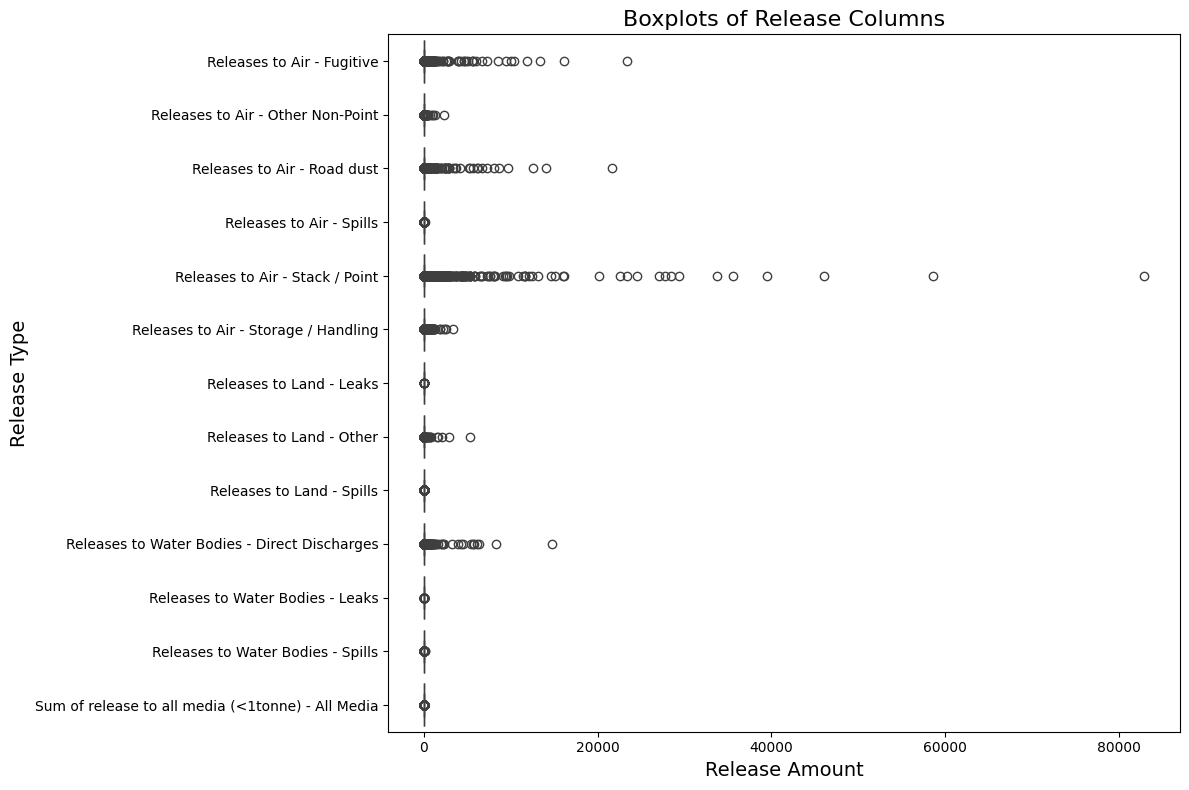

In [42]:
# Are there outliers in the release columns?

# Create boxplots for all release columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_2023[release_columns], orient='h')
plt.title('Boxplots of Release Columns', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()

### Log Transformation

Due to our method of imputing missing values with 0 for the release columns, we will consider applying a log transformation to release columns.

This transformation reduces skewness in data, large variations in scale, and will help handle zeroes in our data since log(0) is undefined.

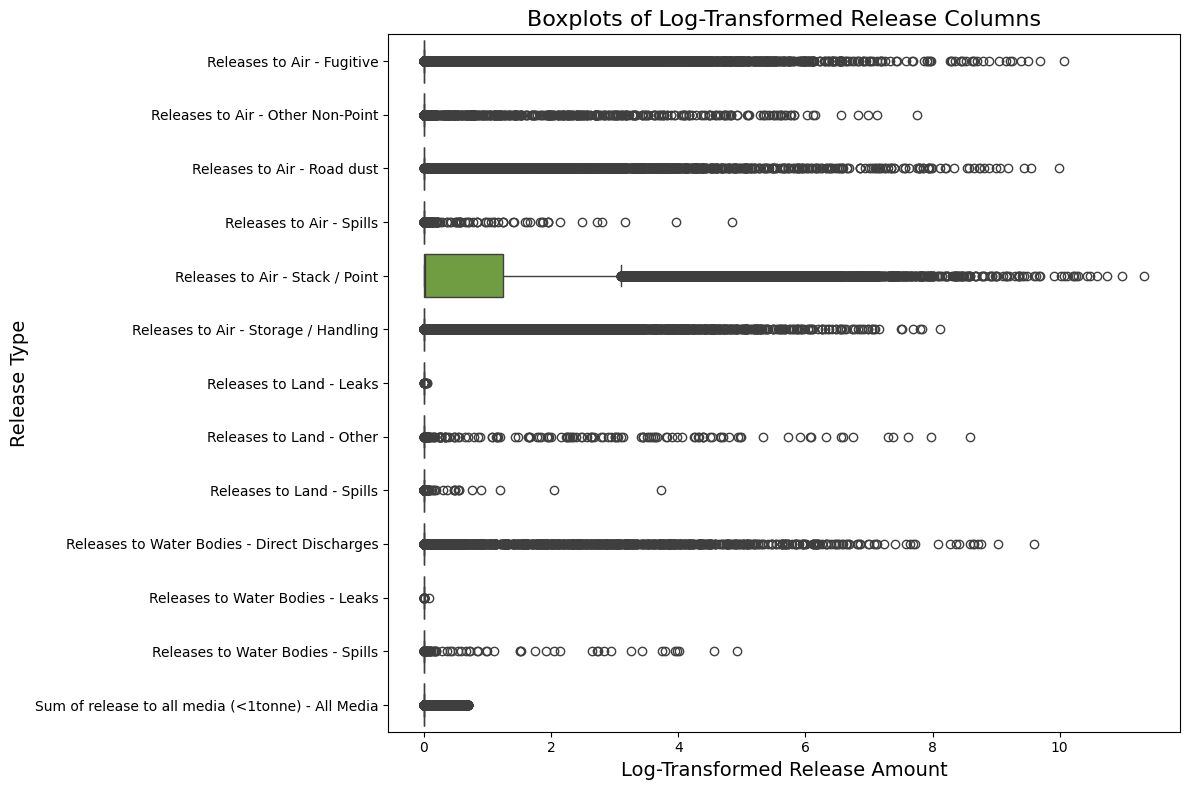

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=np.log1p(df_2023[release_columns]), orient='h')
plt.title('Boxplots of Log-Transformed Release Columns', fontsize=16)
plt.xlabel('Log-Transformed Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()

### Methods of Outlier Detection - Release Columns

We will now compare and contrast various outlier detection methods:

A. IQR Method
B. IQR Method Omitting Zeroes
C. Z-Score Method

#### A. IQR Method

In [44]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply IQR method to each release column
iqr_results = {}
for col in release_columns:
    outliers, lb, ub = detect_outliers_iqr(df_2023, col)
    iqr_results[col] = {
        'outliers': outliers,
        'lower_bound': lb,
        'upper_bound': ub,
        'num_outliers': len(outliers),
        'percent_outliers': len(outliers)/len(df_2023)*100
    }
    print(f"Column: {col}")
    print(f"Number of outliers (IQR): {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df_2023)*100:.2f}%")
    print(f"Lower bound: {lb:.4f}, Upper bound: {ub:.4f}")
    print("-" * 50)

Column: Releases to Air - Fugitive
Number of outliers (IQR): 7226
Percentage of outliers: 13.45%
Lower bound: 0.0000, Upper bound: 0.0000
--------------------------------------------------
Column: Releases to Air - Other Non-Point
Number of outliers (IQR): 762
Percentage of outliers: 1.42%
Lower bound: 0.0000, Upper bound: 0.0000
--------------------------------------------------
Column: Releases to Air - Road dust
Number of outliers (IQR): 1935
Percentage of outliers: 3.60%
Lower bound: 0.0000, Upper bound: 0.0000
--------------------------------------------------
Column: Releases to Air - Spills
Number of outliers (IQR): 242
Percentage of outliers: 0.45%
Lower bound: 0.0000, Upper bound: 0.0000
--------------------------------------------------
Column: Releases to Air - Stack / Point
Number of outliers (IQR): 10612
Percentage of outliers: 19.76%
Lower bound: -3.6843, Upper bound: 6.1405
--------------------------------------------------
Column: Releases to Air - Storage / Handling
Nu

We see from the summary above that, for the majority of our release columns, Q1 and Q3 are both zero, which results in no meaningful bounds for detecting outliers.


#### B. IQR Method Omitting Zeroes

Due to the number of imputed zeroes in our release columns, we will attempt applying the IQR method while excluding any zero values.

This method will ensure that the zero values do not skew the IQR bounds and the outlier detection process.

In [45]:
def detect_outliers_iqr_omit_zero(df, column):
    """
    Detect outliers using IQR method, omitting zero values from the IQR calculation.
    Values outside the lower and upper bounds (calculated using IQR and multiplier)
    are considered outliers.
    """
    # Exclude zero values from the column
    non_zero_column = df[df[column] != 0][column]

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) on non-zero values
    Q1 = non_zero_column.quantile(0.25)
    Q3 = non_zero_column.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds with threshold multiplier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers beyond the bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

iqr_results = {}
for col in release_columns:
    outliers, lb, ub = detect_outliers_iqr_omit_zero(df_2023, col)
    iqr_results[col] = {
        'outliers': outliers,
        'lower_bound': lb,
        'upper_bound': ub,
        'num_outliers': len(outliers),
        'percent_outliers': len(outliers)/len(df_2023)*100
    }
    print(f"Column: {col}")
    print(f"Number of outliers (IQR): {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df_2023)*100:.2f}%")
    print(f"Lower bound: {lb:.4f}, Upper bound: {ub:.4f}")
    print("-" * 50)


Column: Releases to Air - Fugitive
Number of outliers (IQR): 1211
Percentage of outliers: 2.25%
Lower bound: -7.3103, Upper bound: 12.2262
--------------------------------------------------
Column: Releases to Air - Other Non-Point
Number of outliers (IQR): 116
Percentage of outliers: 0.22%
Lower bound: -10.7254, Upper bound: 17.8894
--------------------------------------------------
Column: Releases to Air - Road dust
Number of outliers (IQR): 273
Percentage of outliers: 0.51%
Lower bound: -31.4463, Upper bound: 54.4029
--------------------------------------------------
Column: Releases to Air - Spills
Number of outliers (IQR): 47
Percentage of outliers: 0.09%
Lower bound: -0.3100, Upper bound: 0.5172
--------------------------------------------------
Column: Releases to Air - Stack / Point
Number of outliers (IQR): 4641
Percentage of outliers: 8.64%
Lower bound: -24.8777, Upper bound: 42.0991
--------------------------------------------------
Column: Releases to Air - Storage / Handl

#### C. Z-Score Method


In [46]:
def detect_outliers_zscore(df, column, threshold=3):
    """
    Detect outliers using Z-score method.
    Values beyond threshold standard deviations are considered outliers.
    """
    mean = df[column].mean()
    std = df[column].std()

    z_scores = (df[column] - mean) / std
    outliers = df[abs(z_scores) > threshold]
    return outliers, z_scores

# Apply Z-score method to each release column
zscore_results = {}
for col in release_columns:
    outliers, z_scores = detect_outliers_zscore(df_2023, col)
    zscore_results[col] = {
        'outliers': outliers,
        'z_scores': z_scores,
        'num_outliers': len(outliers),
        'percent_outliers': len(outliers)/len(df_2023)*100
    }
    print(f"Column: {col}")
    print(f"Number of outliers (Z-score): {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df_2023)*100:.2f}%")
    print(f"Min Z-score: {z_scores.min():.2f}, Max Z-score: {z_scores.max():.2f}")
    print("-" * 50)

Column: Releases to Air - Fugitive
Number of outliers (Z-score): 77
Percentage of outliers: 0.14%
Min Z-score: -0.03, Max Z-score: 121.30
--------------------------------------------------
Column: Releases to Air - Other Non-Point
Number of outliers (Z-score): 66
Percentage of outliers: 0.12%
Min Z-score: -0.02, Max Z-score: 157.37
--------------------------------------------------
Column: Releases to Air - Road dust
Number of outliers (Z-score): 75
Percentage of outliers: 0.14%
Min Z-score: -0.03, Max Z-score: 128.41
--------------------------------------------------
Column: Releases to Air - Spills
Number of outliers (Z-score): 25
Percentage of outliers: 0.05%
Min Z-score: -0.01, Max Z-score: 206.54
--------------------------------------------------
Column: Releases to Air - Stack / Point
Number of outliers (Z-score): 130
Percentage of outliers: 0.24%
Min Z-score: -0.06, Max Z-score: 117.96
--------------------------------------------------
Column: Releases to Air - Storage / Handlin

We can see from the above summary that the Z-score method seems to have worked well in detecting outliers across our columns. The percentage of outliers is generally quite small, with the highest being 0.24% of data points in the column except for the 'Sum of releases to all media' column which has 0.97% outliers


#### Comparison

We have chosen to cap outliers, meaning that extreme values are replaced with less extreme values (e.g. upper and lower bounds defined by the IQR method).

Capping helps to reduce the influence of outliers without completely removing the data points.

##### Cap Outliers Using Z-Score Method

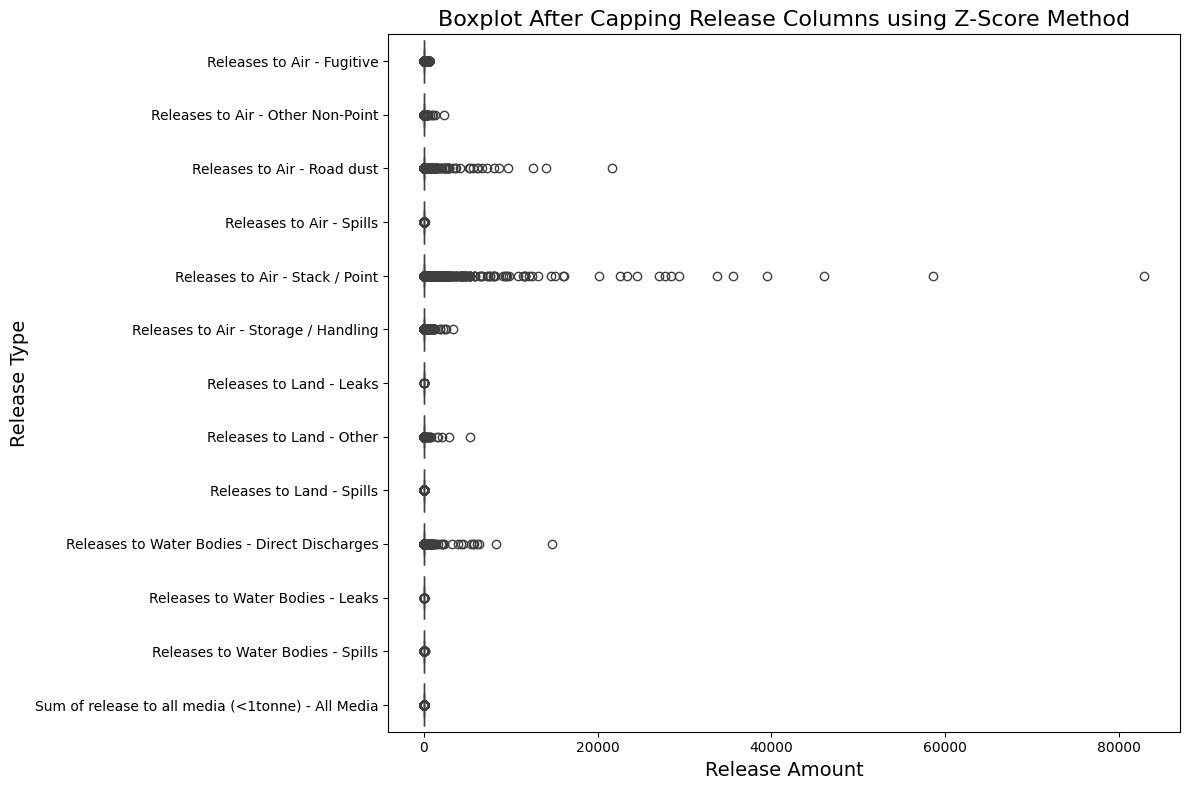

In [47]:
def cap_outliers_zscore(df, columns, threshold=3):
    """
    Capping outliers using Z-score method.
    Any value beyond the threshold standard deviations is capped to the threshold.
    """

    for col in columns:
        # Calculate the Z-scores
        mean = df[col].mean()
        std = df[col].std()

        z_scores = (df[col] - mean) / std

        # Cap values beyond the Z-score threshold
        df[col] = np.where(z_scores > threshold, mean + threshold * std, df[col])
        df[col] = np.where(z_scores < -threshold, mean - threshold * std, df[col])

        return df

df_zscore = cap_outliers_zscore(df_2023, release_columns)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_zscore[release_columns], orient='h')
plt.title(f'Boxplot After Capping Release Columns using Z-Score Method', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()


##### Cap Outliers Using IQR - Omitting Zeroes

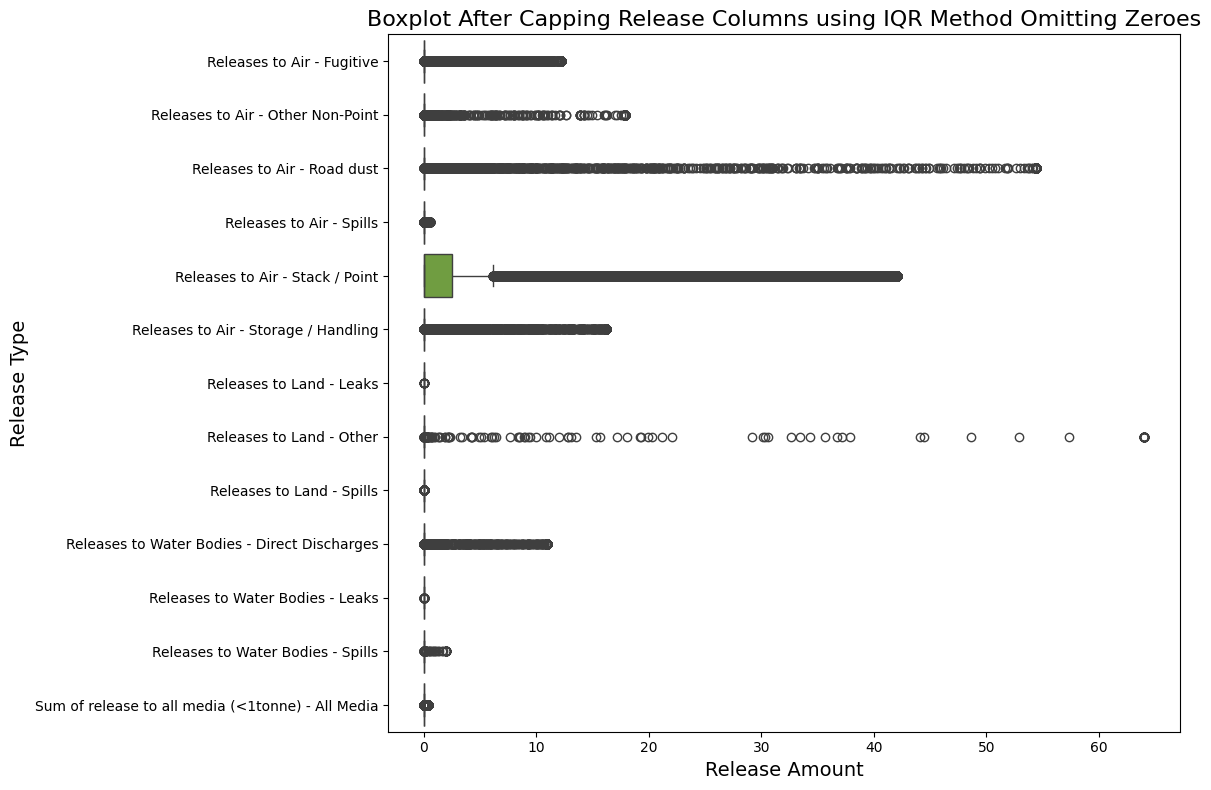

In [48]:
def cap_outliers_iqr_omit_zero(df, columns):
    """
    Cap outliers using IQR method, omitting zero values.
    Any value below the lower bound or above the upper bound is capped to the corresponding bound.
    """

    for col in columns:
        # Exclude zero values from the column for IQR calculation
        non_zero_column = df[df[col] != 0][col]

        # Calculate Q1 (25th percentile) and Q3 (75th percentile) on non-zero values
        Q1 = non_zero_column.quantile(0.25)
        Q3 = non_zero_column.quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds using the IQR method with the threshold multiplier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values below the lower bound and above the upper bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

df_iqr_omit_zero = cap_outliers_iqr_omit_zero(df_2023, release_columns)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_iqr_omit_zero[release_columns], orient='h')
plt.title(f'Boxplot After Capping Release Columns using IQR Method Omitting Zeroes', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()


##### Boxplot of Values Without Zeros

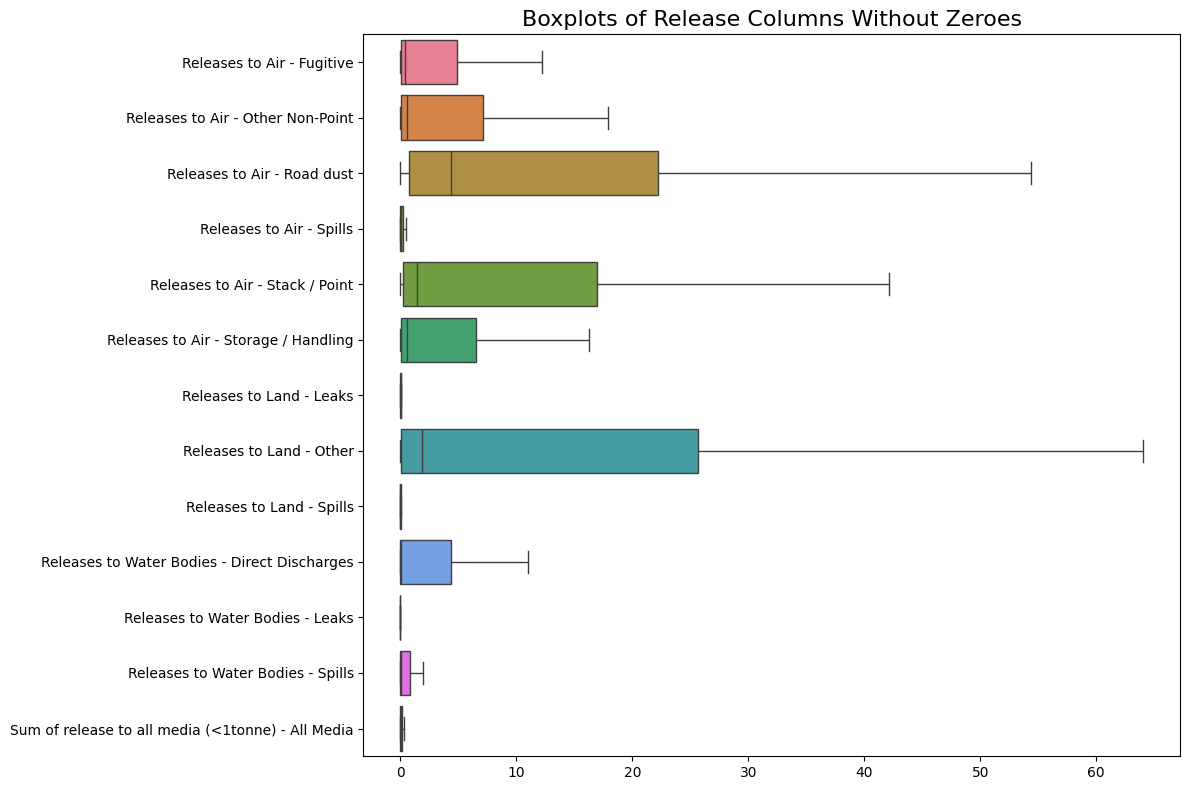

In [49]:
# Boxplot without zeroes

data_filtered = df_2023[df_2023[release_columns] != 0]

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_filtered[release_columns], orient='h')
plt.title('Boxplots of Release Columns Without Zeroes', fontsize=16)
plt.tight_layout()
plt.show()

We can see from comparing the boxplots above that the IQR method omitting zeroes does a more effective job of detecting outliers for the release columns.

We can also see a similar distribution to the boxplot of release column values without zero values.

# 6. Pattern Discovery, Visualizations & Statistics

We first save our pre-cleaned dataset into a csv file to avoid modifying the original.

In [50]:
df_iqr_omit_zero.to_csv("df_2023_releases_preclean.csv", index=False)

In [51]:
# Create working copies for EDA, and to avoid modifying original
df_clean = df_iqr_omit_zero.copy()


In [52]:
df_clean.head()

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Units,Estimation_Method_Code,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media
16,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,100-42-5,styrene,tonnes,E2,0.000,0.0,0.0,0.0,1.310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,10049-04-4,chlorine dioxide,tonnes,M3,0.000,0.0,0.0,0.0,4.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,tonnes,E2,0.363,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,tonnes,E2,0.000,0.0,0.0,0.0,1.861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-95-2,phenol,tonnes,E2,0.001,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create New Columns

We will create aggregated features that sum release value data scross specific columns in our dataframe.

This will create a more manageable set of features to visualize.

In [53]:
release_cols = [
    'Releases to Air - Fugitive',
    'Releases to Air - Other Non-Point',
    'Releases to Air - Road dust',
    'Releases to Air - Spills',
    'Releases to Air - Stack / Point',
    'Releases to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne) - All Media'
]

In [54]:
# Create aggregate features for analysis
df_clean['Total_Air_Releases'] = df_clean[[col for col in release_cols if 'Air' in col]].sum(axis=1)
df_clean['Total_Land_Releases'] = df_clean[[col for col in release_cols if 'Land' in col]].sum(axis=1)
df_clean['Total_Water_Releases'] = df_clean[[col for col in release_cols if 'Water' in col]].sum(axis=1)
df_clean['Total_All_Releases'] = df_clean[release_cols].sum(axis=1)



Saving df_clean with new columns

In [55]:
df_clean.to_csv("df_clean_2023_releases_total_new_columns.csv", index=False)

In [56]:
df = df_clean.copy()

In [57]:
df.head()

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Units,Estimation_Method_Code,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media,Total_Air_Releases,Total_Land_Releases,Total_Water_Releases,Total_All_Releases
16,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,100-42-5,styrene,tonnes,E2,0.000,0.0,0.0,0.0,1.310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.310,0.0,0.0,1.310
17,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,10049-04-4,chlorine dioxide,tonnes,M3,0.000,0.0,0.0,0.0,4.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.740,0.0,0.0,4.740
18,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,tonnes,E2,0.363,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363,0.0,0.0,0.363
19,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,tonnes,E2,0.000,0.0,0.0,0.0,1.861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.861,0.0,0.0,1.861
20,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-95-2,phenol,tonnes,E2,0.001,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.001


### Correlation Analysis - Release Columns

Understanding the relationships between different types of pollutant releases helps identify underlying patterns that might not be visible when looking at total releases alone.

This analysis:

* Reveals if certain types of pollutants tend to be released together, suggesting common industrial processes
* Identifies potential substitution effects (where reduction in one type of release leads to increase in another)
* Supports feature selection for predictive modeling by showing which release types are independent vs. correlated
* Helps identify potential regulatory impacts that affect some release types but not others
* Provides insights into how comprehensive pollution reduction efforts need to be across release types

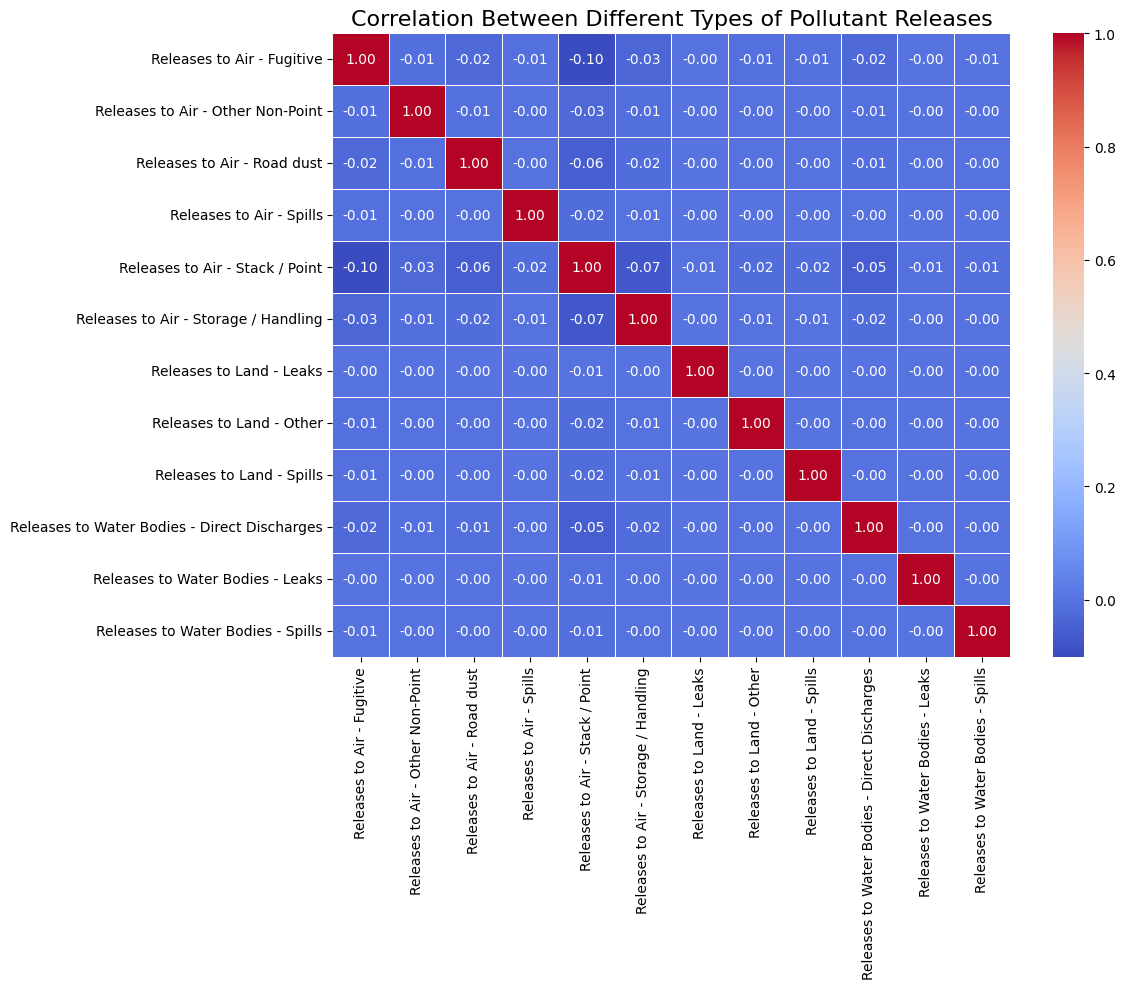

In [58]:
# Select release columns for correlation analysis
release_columns = [col for col in df_clean.columns if 'Release' in col and 'Total' not in col]

# Calculate correlation matrix
release_corr = df_clean[release_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(release_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Different Types of Pollutant Releases', fontsize=16)
plt.tight_layout()
plt.show()

**Observations:**

Overall, the correlation heatmap for release columns reveals that there are generally weak correlations between different types of pollutant releases. This suggests that the factors influencing these releases are complex and varied.

**Air Releases**
* Moderate positive correlation (0.18) between Fugutive and Road Dust suggests these two sources may be influenced by similar factors.

**Land Releases**
* Moderate positive correlation (0.16) between leaks and spills suggests that incidents leading to leaks might also be associated with spills.

**Cross-Type Correlations**
* Most correlations between air, land, and water releases are weak. This indicates that pollutants don't necessarily transfer easily between these environmental compartments.


### Correlation Analysis - All Numeric Columns

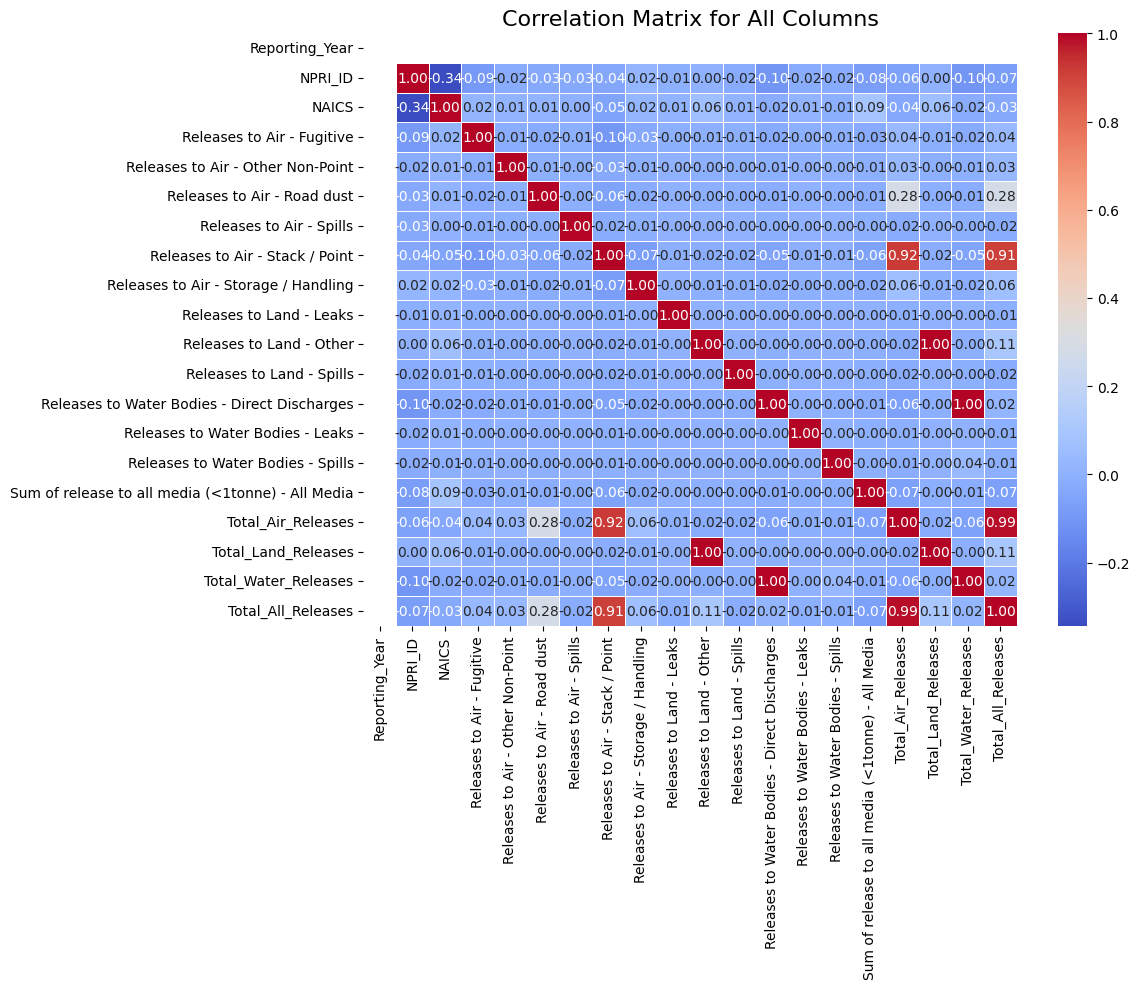

In [59]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

numeric_corr = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Columns', fontsize=16)
plt.tight_layout()
plt.show()

**Observations:**

The heatmap provides a quick overview of the relationships between different variables in our dataset. However, it also emphasizes the prevalence of weak correlations, suggesting that many factors influencing pollutant releases are complex and may require further investigation to understand fully.

### Geographical Distribution of Pollutants


Location is a critical factor in understanding pollution patterns, as different provinces have different industrial compositions, regulations, and economic conditions.

This analysis:

* Identifies regional pollution hotspots that might require special attention
* Shows if certain provinces are making more progress than others in reducing emissions over time
* Reveals potential regional economic shifts as industries grow or decline in different areas
* Helps determine if predictions should be made at national level or disaggregated by province
* Supports policy recommendations by highlighting regional success stories or areas needing intervention

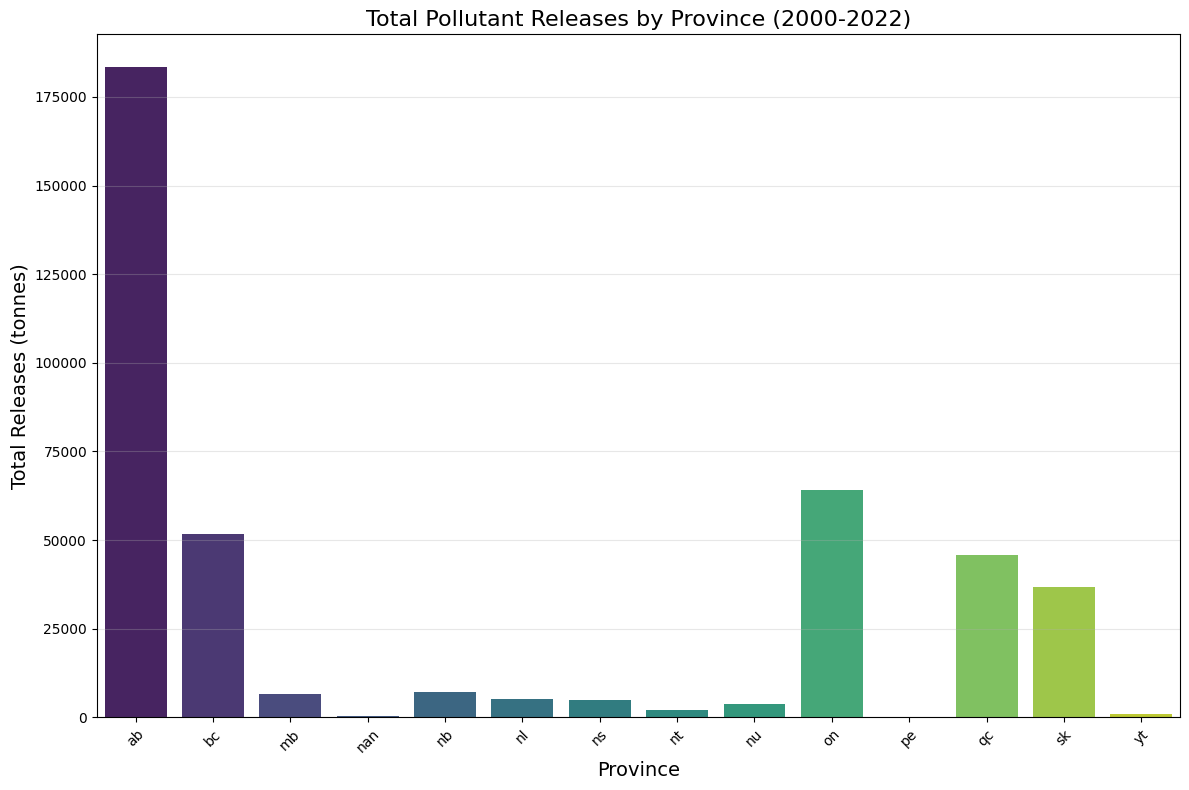

In [60]:
# Create a map of Canada showing pollution by province
province_pollution = df_clean.groupby('Province')['Total_All_Releases'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Province', y='Total_All_Releases', data=province_pollution, hue='Province', palette='viridis')
plt.title('Total Pollutant Releases by Province (2000-2022)', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Total Releases (tonnes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


**Observations:**

* Alberta leads in pollutant releases, likely due to the large oil, gas, and industrial sectors in this province.

* Ontario follows second, with emissions likely stemming from manufacturing, transportation, and industrial activities.

* British Columbia follows third, with a mix of industrial emissions and natural resource extraction.

* Quebec and Saskatchewan both have moderate emissions.

* All other provinces and territories have much lower releases.